## load datasets and analysis

In [239]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
warnings.filterwarnings('ignore')

### understanding the data
- **what types of data are contained in the training set and test set?**
- **Are there any missing values?**
- **What are the distribution of each feature?**

In [240]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [243]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [244]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [245]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Some insights
1. The data types for training set contain:  float64(2), int64(5), object(5); and the data types for testing set contain: float64(2), int64(4), object(5).
2. PassengerID, Pclass, SibSp, Parch, Sex and Embarked are all categorical features but using int to represent.
3. In the 891 total samples in training sets, 'Age' has some missing values, 'Embarked' has a few missing values, and 'Cabin' has a lot of missing values (might need to dump it)
4. In the 418 total samples in testing sets, 'Age' has some missing values, 'Fare' has 1 missing value, and 'Cabin' has a lot of missing values.
5. There are 0's in 'fare', which should not be, might need to fill in some values.

**use median/mode to fill out the missing values in embarked and fare since there have only a few missing values. **
**for age, we can use median/mean, or even classification**

In [246]:
# using median since it seems like a skewed distribution
fare_ = train['Fare'].median() 
test.loc[pd.isnull(test.Fare),'Fare'] = fare_

# embarked is a categorical data, using mode to fill out
embarked_ = train['Embarked'].mode()
train.loc[pd.isnull(train.Embarked),['Embarked']] = embarked_[0]

# using median since it seems like a skewed distribution (try this out)
train.loc[pd.isnull(train.Age),['Age']] = train['Age'].median()
test.loc[pd.isnull(test.Age),['Age']] = test['Age'].median()

In [247]:
# just checking the data
train.info()
print('-'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

## Feature Engineering

In [248]:
# cutting out the datasets for training set and testing set
result = train['Survived']

train.drop('Survived',axis=1,inplace=True)
X_train,X_test,Y_train,Y_test = train_test_split(train,result,test_size=0.3,random_state=1)

X_train['Survived'] = Y_train
X_test['Survived'] = Y_test

## Sex

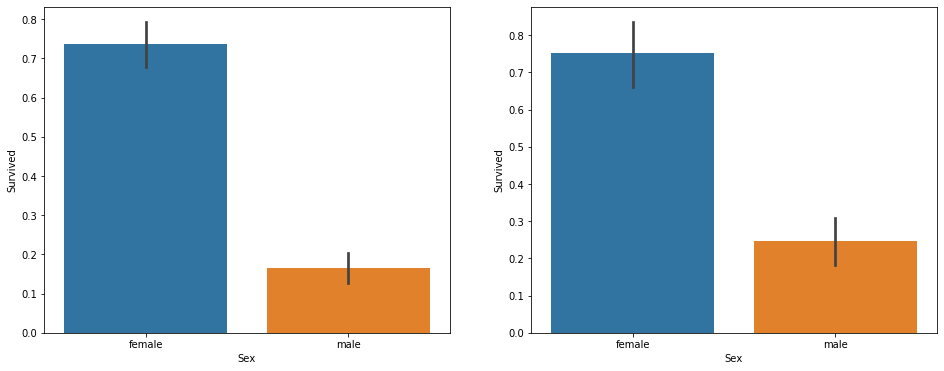

In [249]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.barplot('Sex','Survived',data=X_train,ax=axis1)
sns.barplot('Sex','Survived',data=X_test,ax=axis2)

**we notice the survival rate is somewhat similar from the training set to the testing set. Also, the difference in survival between male and female is significant, so we will use this feature later on.**

In [250]:
# change the 'male' and 'female' into 1 and 0
train['Sex'] = train['Sex'].apply(lambda x : 1 if x =='male' else 0)
test['Sex'] = test['Sex'].apply(lambda x : 1 if x =='male' else 0)
train = pd.get_dummies(data=train,columns=['Sex'])
test = pd.get_dummies(data=test,columns = ['Sex'])


## Name
We notice some 'master','Mr','Miss' and etc that would actually reflect the person's sex and social position.
We also notice that the ones who named "Mr." has a lower survival rate, and those who named "Mrs." and "Miss" have a high survival rate. We are going to group the "Mrs" and "Miss" with others like "lady","Mile" that all represent female into 1 for easy representing.
Others like "Dr" has so few so we just group them together.

In [251]:
def grouping_name(i):
    if i == 'Mr.':
        return 1
    if (i == 'Mrs.') or (i=='Ms.') or (i=='Lady.') or (i == 'Mlle.') or (i =='Mme'):
        return 2
    if i == 'Miss':
        return 3
    if i == 'Dr.' or (i == 'Rev.'):
        return 4
    return 5

In [252]:
# taking out the useful part in 'Name' and categorize them
X_train['Name_Title'] = X_train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
X_test['Name_Title'] = X_test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [253]:
X_train.groupby('Name_Title')['Survived'].count()

Name_Title
Capt.        1
Col.         2
Don.         1
Dr.          4
Lady.        1
Major.       1
Master.     27
Miss.      126
Mlle.        1
Mme.         1
Mr.        365
Mrs.        87
Rev.         5
the          1
Name: Survived, dtype: int64

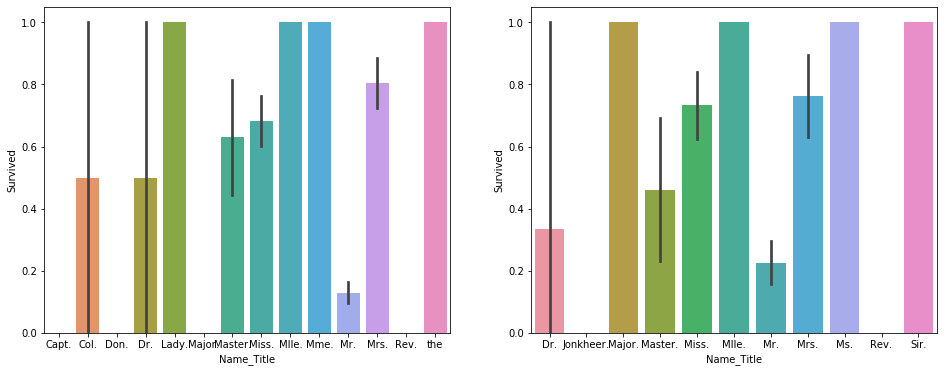

In [254]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.barplot('Name_Title','Survived',data=X_train.sort_values('Name_Title'),ax=axis1)
sns.barplot('Name_Title','Survived',data=X_test.sort_values('Name_Title'),ax=axis2)


In [255]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

train['Name_Title'] = train['Name_Title'].apply(grouping_name)
test['Name_Title'] = test['Name_Title'].apply(grouping_name)

train = pd.get_dummies(columns = ['Name_Title'],data=train)
test = pd.get_dummies(columns = ['Name_Title'],data = test)
train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,0,0


**we can do another thing for the name. The length of the name might contribute to his/her survival rate, but we are really not sure about this.**

In [256]:
'''
X_train['Name_len'] = X_train['Name'].apply(lambda x: len(x))
X_test['Name_len'] = X_test['Name'].apply(lambda x: len(x))

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.barplot('Name_len','Survived',data=X_train.sort_values('Name_len'),ax=axis1)
sns.barplot('Name_len','Survived',data=X_test.sort_values('Name_len'),ax=axis2)
'''

"\nX_train['Name_len'] = X_train['Name'].apply(lambda x: len(x))\nX_test['Name_len'] = X_test['Name'].apply(lambda x: len(x))\n\nfig,(axis1,axis2) = plt.subplots(1,2,figsize=(16,6))\nsns.barplot('Name_len','Survived',data=X_train.sort_values('Name_len'),ax=axis1)\nsns.barplot('Name_len','Survived',data=X_test.sort_values('Name_len'),ax=axis2)\n"

In [257]:
'''
train['Name_len'] = train['Name'].apply(lambda x: len(x))
test['Name_len'] = test['Name'].apply(lambda x: len(x))
'''

"\ntrain['Name_len'] = train['Name'].apply(lambda x: len(x))\ntest['Name_len'] = test['Name'].apply(lambda x: len(x))\n"

## Ticket

In [258]:
def Ticket_Letter(x):
    return x[0]

X_train['Ticket_First_Letter'] = X_train['Ticket'].apply(Ticket_Letter)
X_test['Ticket_First_Letter'] = X_test['Ticket'].apply(Ticket_Letter)
X_train.groupby('Ticket_First_Letter')['Survived'].count()

Ticket_First_Letter
1     87
2    129
3    225
4     10
5      2
6      6
7      6
8      1
9      1
A     20
C     32
F      3
L      3
P     49
S     40
W      9
Name: Survived, dtype: int64

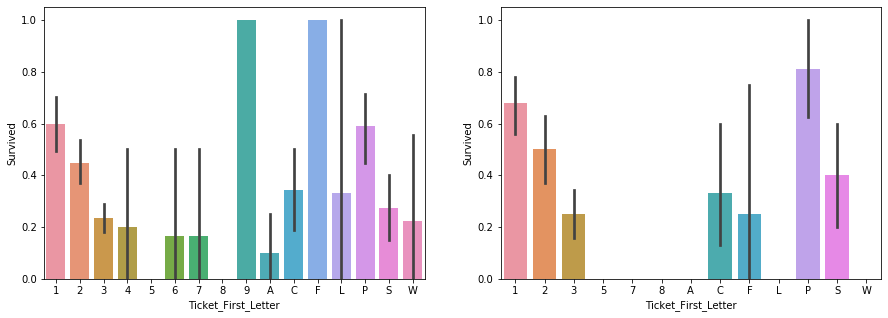

In [259]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Ticket_First_Letter', 'Survived', data=X_train.sort_values('Ticket_First_Letter'), ax=axis1) 
sns.barplot('Ticket_First_Letter', 'Survived', data=X_test.sort_values('Ticket_First_Letter'), ax=axis2)

In [260]:
def Ticket_First_Letter_Code(x):
    if (x == '1') or (x == 'P'):
        return 1
    if x == '2':
        return 2
    if x == '3' or (x == '4') or (x == '6') or (x == '7') or ( x == 'W'):
        return 3
    if x == 'C' or (x == 'S'):
        return 4
    #if x == 'S':
     #   return 5
    #if x == 'P':
     #   return 6
    #if x == '6':
    #    return 7
    #if x == '7':
    #    return 8
    if x == 'A':
        return 5
   # if x == 'W':
    #    return 10
    return 6

In [261]:
train['Ticket_First_Letter'] = train['Ticket'].apply(Ticket_Letter)
test['Ticket_First_Letter'] = test['Ticket'].apply(Ticket_Letter)

train['Ticket_First_Letter'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

In [262]:
test['Ticket_First_Letter'].unique()

array(['3', '2', '7', 'A', '6', 'W', 'S', 'P', 'C', '1', 'F', '4', '9',
       'L'], dtype=object)

In [263]:
train['Ticket_First_Letter'] = train['Ticket_First_Letter'].apply(Ticket_First_Letter_Code)
test['Ticket_First_Letter'] = test['Ticket_First_Letter'].apply(Ticket_First_Letter_Code)
train = pd.get_dummies(columns = ['Ticket_First_Letter'], data = train) 
test = pd.get_dummies(columns = ['Ticket_First_Letter'], data = test)

## Cabin

1. Need to deal with the missing values
2. it's a feature with both numbers and letters

In [264]:
# def cabin_num(train, test):
#     for i in [train, test]:
#         i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
#         i['Cabin_num1'].replace('an', np.NaN, inplace = True)
#         i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
#         i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
#     train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
#     test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
#     del train['Cabin_num']
#     del test['Cabin_num']
#     del train['Cabin_num1']
#     del test['Cabin_num1']
#     return train, test

# train,test = cabin_num(train, test) 

X_train['Cabin'] = X_train['Cabin'].fillna('Missing')
X_test['Cabin'] = X_test['Cabin'].fillna('Missing')

def Cabin_First_Letter(x):
    if x == 'Missing':
        return 'XX'
    return x[0]

In [265]:
X_train['Cabin_First_Letter'] = X_train['Cabin'].apply(Cabin_First_Letter)
X_test['Cabin_First_Letter'] = X_test['Cabin'].apply(Cabin_First_Letter)

X_train.groupby('Cabin_First_Letter')['Survived'].count()

Cabin_First_Letter
A      12
B      28
C      41
D      21
E      22
F       8
G       3
XX    488
Name: Survived, dtype: int64

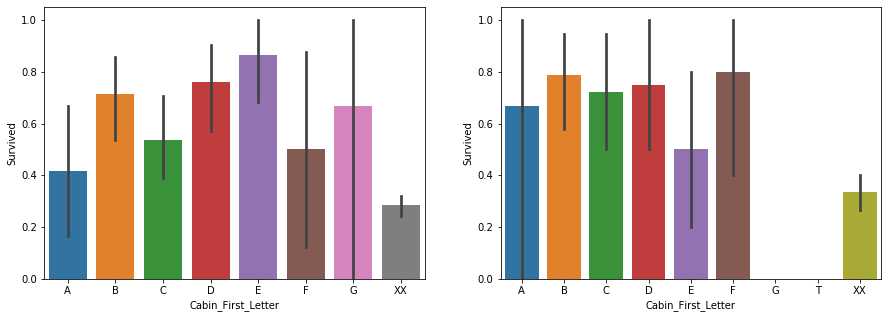

In [266]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Cabin_First_Letter', 'Survived', data=X_train.sort_values('Cabin_First_Letter'), ax=axis1) 
sns.barplot('Cabin_First_Letter', 'Survived', data=X_test.sort_values('Cabin_First_Letter'), ax=axis2)

In [267]:
def Cabin_First_Letter_Code(x):
    if x == 'XX':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4     
    return 5

train['Cabin'] = train['Cabin'].fillna('Missing')
test['Cabin'] = test['Cabin'].fillna('Missing')

train['Cabin_First_Letter'] = train['Cabin'].apply(Cabin_First_Letter)
test['Cabin_First_Letter'] = test['Cabin'].apply(Cabin_First_Letter) 

train['Cabin_First_Letter'] = train['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)
test['Cabin_First_Letter'] = test['Cabin_First_Letter'].apply(Cabin_First_Letter_Code)

train = pd.get_dummies(columns = ['Cabin_First_Letter'], data = train) 
test = pd.get_dummies(columns = ['Cabin_First_Letter'], data = test)

## Embarked

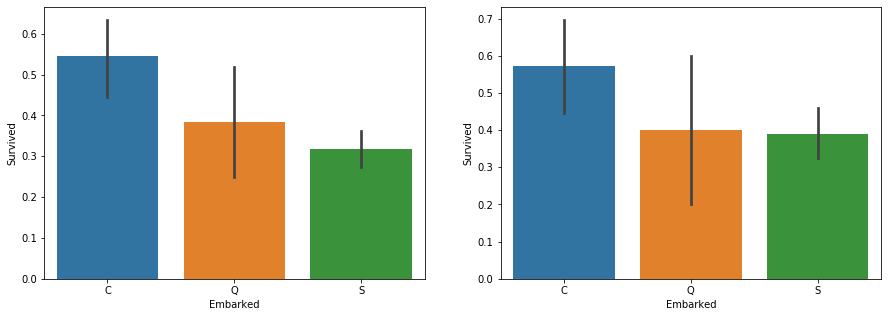

In [268]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Embarked', 'Survived', data=X_train.sort_values('Embarked'), ax=axis1) 
sns.barplot('Embarked', 'Survived', data=X_test.sort_values('Embarked'), ax=axis2)

In [269]:
train = pd.get_dummies(train,columns = ['Embarked'])
test = pd.get_dummies(test,columns = ['Embarked'])

## SibSp

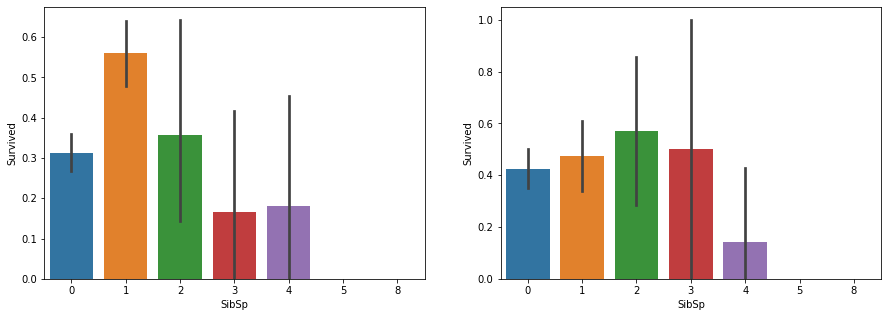

In [270]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp', 'Survived', data=X_train.sort_values('SibSp'), ax=axis1) 
sns.barplot('SibSp', 'Survived', data=X_test.sort_values('SibSp'), ax=axis2) 

## SibSp + Parch

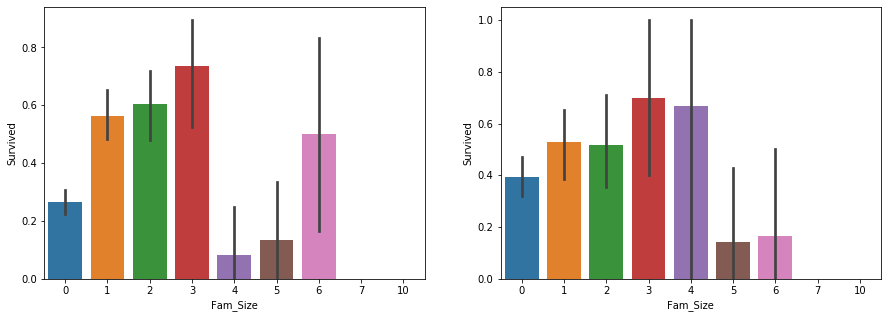

In [271]:
X_train['Fam_Size'] = X_train['SibSp']  + X_train['Parch'] 
X_test['Fam_Size'] = X_test['SibSp']  + X_test['Parch'] 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Fam_Size', 'Survived', data=X_train.sort_values('Parch'), ax=axis1) 
sns.barplot('Fam_Size', 'Survived', data=X_test.sort_values('Parch'), ax=axis2) 

In [272]:
def Family_feature(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test 
train, test  = Family_feature(train, test)

train = pd.get_dummies(train,columns = ['Fam_Size']) 
test =  pd.get_dummies(test,columns = ['Fam_Size']) 

## Pclass

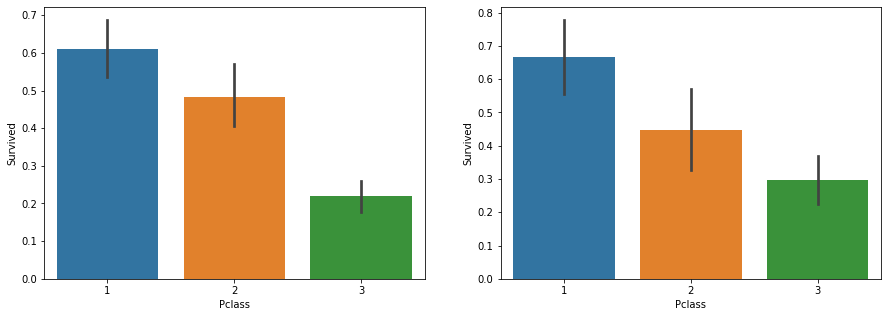

In [273]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Pclass', 'Survived', data=X_train.sort_values('Pclass'), ax=axis1) 
sns.barplot('Pclass', 'Survived', data=X_test.sort_values('Pclass'), ax=axis2)

In [274]:
train['Pclass_1']  = np.int32(train['Pclass'] == 1)  
train['Pclass_2']  = np.int32(train['Pclass'] == 2)  
train['Pclass_3']  = np.int32(train['Pclass'] == 3)  

test['Pclass_1']  = np.int32(test['Pclass'] == 1)  
test['Pclass_2']  = np.int32(test['Pclass'] == 2)  
test['Pclass_3']  = np.int32(test['Pclass'] == 3)

## Age

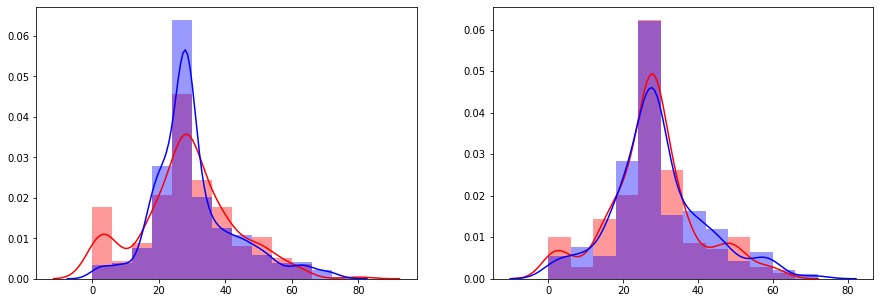

In [275]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Age'].dropna().values, bins=range(0, 81, 6),color='red', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Age'].dropna().values, bins=range(0, 81, 6),color = 'blue', ax=axis2) 

In [276]:
# X_test.groupby('Age')['Survived'].count()

In [277]:
train['Small_Age'] = np.int32(train['Age'] <= 5)  
train['Old_Age'] = np.int32(train['Age'] >= 65)  
train['Middle_Age'] = np.int32((train['Age'] >= 15) & (train['Age'] <= 25))  
 
test['Small_Age'] = np.int32(test['Age'] <= 5)  
test['Old_Age'] = np.int32(test['Age'] >= 65)  
test['Middle_Age'] = np.int32((test['Age'] >= 15) & (test['Age'] <= 25)) 

## Fare

In [278]:
X_train.describe()
X_train['Fare'] = X_train['Fare'] + 1
X_test['Fare'] = X_test['Fare'] + 1

X_train['Fare'] = X_train['Fare'].apply(np.log)
X_test['Fare'] = X_test['Fare'].apply(np.log)

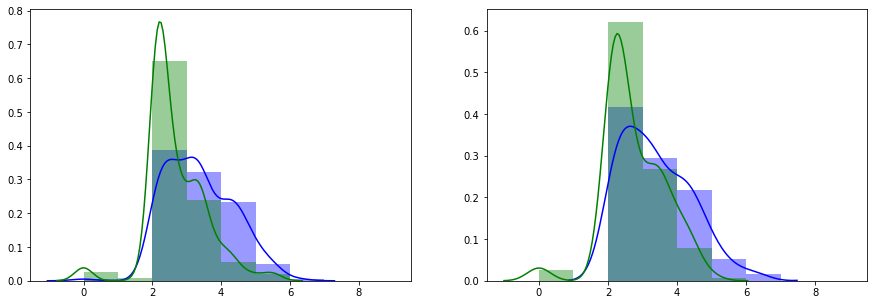

In [279]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(X_train[X_train.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='blue', ax=axis1) 
sns.distplot(X_train[X_train.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'green', ax=axis1) 

sns.distplot(X_test[X_test.Survived==1]['Fare'].dropna().values, bins=range(0, 10, 1),color='blue', ax=axis2) 
sns.distplot(X_test[X_test.Survived==0]['Fare'].dropna().values, bins=range(0, 10, 1),color = 'green', ax=axis2)


In [280]:
train['Fare'] = train['Fare'] + 1
test['Fare'] = test['Fare'] + 1

train['Fare'] = train['Fare'].apply(np.log)
test['Fare'] = test['Fare'].apply(np.log) 

In [281]:
train['Fare_0_2'] = np.int32(train['Fare'] <= 2)
train['Fare_2_3'] = np.int32((train['Fare'] > 2) & (train['Fare'] <= 3) )
train['Fare_3_4'] = np.int32((train['Fare'] > 3) & (train['Fare'] <= 4) )
train['Fare_4_5'] = np.int32((train['Fare'] > 4) & (train['Fare'] <= 5)) 
train['Fare_5_'] = np.int32(train['Fare'] > 5)


test['Fare_0_2'] = np.int32(test['Fare'] <= 2)
test['Fare_2_3'] = np.int32((test['Fare'] > 2) & (test['Fare'] <= 3) )
test['Fare_3_4'] = np.int32((test['Fare'] > 3) & (test['Fare'] <= 4) )
test['Fare_4_5'] = np.int32((test['Fare'] > 4) & (test['Fare'] <= 5)) 
test['Fare_5_'] = np.int32(test['Fare'] > 5)

#can also do
# train['FareBin'] = pd.qcut(train['Fare'],5)
# test['FareBin'] = pd.qcut(test['Fare'],5)

In [282]:
#pp = sns.pairplot(train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
#pp.set(xticklabels=[])

Text(0.5, 1, 'Sex vs Fam_Size Survival Comparison')

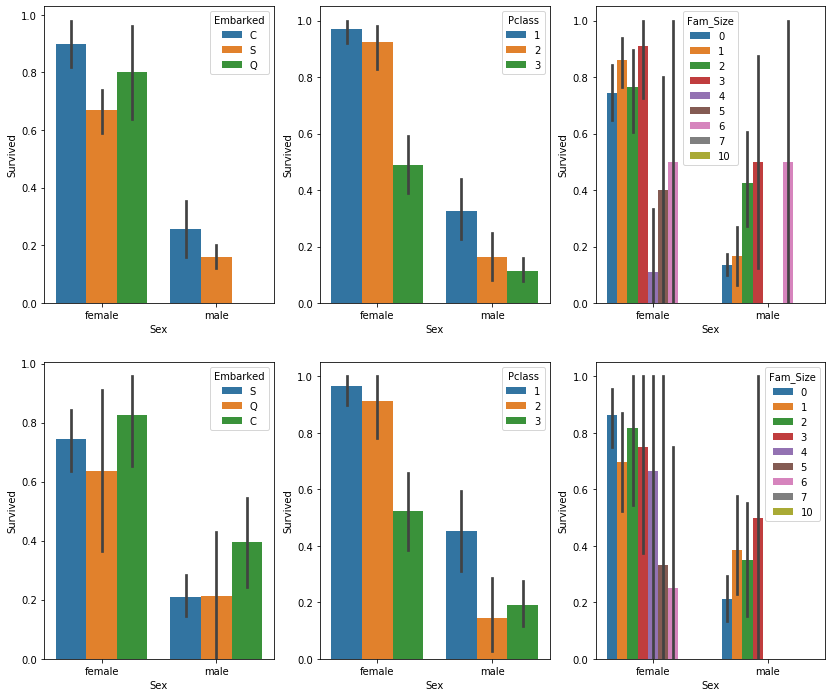

In [283]:
fig, qaxis = plt.subplots(2,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=X_train, ax = qaxis[0,0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=X_train, ax  = qaxis[0,1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Fam_Size', data=X_train, ax  = qaxis[0,2])
axis1.set_title('Sex vs Fam_Size Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=X_test, ax = qaxis[1,0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=X_test, ax  = qaxis[1,1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Fam_Size', data=X_test, ax  = qaxis[1,2])
axis1.set_title('Sex vs Fam_Size Survival Comparison')

In [284]:
'''
#train['Female_Pclass_3']  = np.int32(train['Pclass'] == 3 and train['Sex']==Female)  
condition1 = train['Pclass'].apply(lambda x : 1 if x =='3' else 0)
condition2 = train['Sex_0'].apply(lambda y: 1 if y == '0' else 0)
train['Female_Pclass_3'] = np.logical_and(condition1, condition2)
#train['Female_Pclass_3'] = train['Pclass'].apply(lambda x : 1 if ((x=='3') and train['Sex'].apply(lambda y: 1 if y == 'female' else 0)) else 0)
condition1 = test['Pclass'].apply(lambda x : 1 if x =='3' else 0)
condition2 = test['Sex_0'].apply(lambda y: 1 if y == '0' else 0)
test['Female_Pclass_3'] = np.logical_and(condition1, condition2)

train = pd.get_dummies(data=train,columns=['Pclass'])
#test = pd.get_dummies(data=test,columns = ['Sex'])
'''

"\n#train['Female_Pclass_3']  = np.int32(train['Pclass'] == 3 and train['Sex']==Female)  \ncondition1 = train['Pclass'].apply(lambda x : 1 if x =='3' else 0)\ncondition2 = train['Sex_0'].apply(lambda y: 1 if y == '0' else 0)\ntrain['Female_Pclass_3'] = np.logical_and(condition1, condition2)\n#train['Female_Pclass_3'] = train['Pclass'].apply(lambda x : 1 if ((x=='3') and train['Sex'].apply(lambda y: 1 if y == 'female' else 0)) else 0)\ncondition1 = test['Pclass'].apply(lambda x : 1 if x =='3' else 0)\ncondition2 = test['Sex_0'].apply(lambda y: 1 if y == '0' else 0)\ntest['Female_Pclass_3'] = np.logical_and(condition1, condition2)\n\ntrain = pd.get_dummies(data=train,columns=['Pclass'])\n#test = pd.get_dummies(data=test,columns = ['Sex'])\n"

In [285]:
#print(train['Female_Pclass_3'].count())

## Model Training

In [286]:
# get the asme columns in both training set and testing set
train.drop(['Ticket','PassengerId','Name','Age','Cabin','Pclass'],axis = 1, inplace=True)
test.drop( ['PassengerId','Ticket','Name','Age','Cabin','Pclass'],axis =1, inplace=True) 

In [287]:
X_train_ = train.loc[X_train.index]
X_test_ = train.loc[X_test.index]

Y_train_ = result.loc[X_train.index]
Y_test_ = result.loc[X_test.index]

X_test_ = X_test_[X_train_.columns]

In [288]:
pd.set_option('display.max_columns',50)
train.head()

,Fare,Sex_0,Sex_1,Name_Title_1,Name_Title_2,Name_Title_4,Name_Title_5,Ticket_First_Letter_1,Ticket_First_Letter_2,Ticket_First_Letter_3,Ticket_First_Letter_4,Ticket_First_Letter_5,Ticket_First_Letter_6,Cabin_First_Letter_1,Cabin_First_Letter_2,Cabin_First_Letter_3,Cabin_First_Letter_4,Cabin_First_Letter_5,Embarked_C,Embarked_Q,Embarked_S,Fam_Size_Big,Fam_Size_Nuclear,Fam_Size_Solo,Pclass_1,Pclass_2,Pclass_3,Small_Age,Old_Age,Middle_Age,Fare_0_2,Fare_2_3,Fare_3_4,Fare_4_5,Fare_5_
0,2.110213,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,4.280593,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,2.188856,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,3.990834,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,2.202765,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [289]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#print(result.shape[0])
#print(train[train.columns].isnull())
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = result.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train[train.columns], result, cv  = cv_split,return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train[train.columns], result)
    MLA_predict[MLA_name] = alg.predict(train[train.columns])

    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.905431,0.83097,0.0720343,0.0727042
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.834082,0.83097,0.0522774,0.0440811
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.884082,0.823134,0.0609432,0.109013
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.835206,0.823134,0.0503607,0.00368631
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.838577,0.822388,0.0523134,0.00458872
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.891948,0.820149,0.0505098,0.116885
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.841199,0.81903,0.069412,0.248239
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.839139,0.817537,0.062215,0.0266274
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.824906,0.816418,0.0745559,0.0530645
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.84794,0.815299,0.0774332,0.045417


Text(0, 0.5, 'Algorithm')

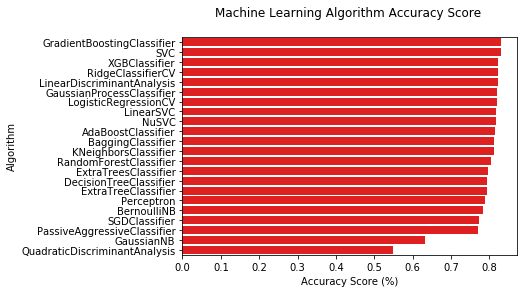

In [290]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'r')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Based on the question, we know that there are 1502/2224 = 67.5% people died. Thus, if we just make our guest that all people die, we will be right like 67.5% right. Then the lower bound of the model should have a correctness higher than this, otherwise we can just brute force/guess on them.

In [291]:
#print(MLA_predict.shape[0])
'''
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(df, method='pearson', min_periods=1), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(MLA_predict)
'''

"\ndef correlation_heatmap(df):\n    _ , ax = plt.subplots(figsize =(14, 12))\n    colormap = sns.diverging_palette(220, 10, as_cmap = True)\n    \n    _ = sns.heatmap(\n        df.corr(df, method='pearson', min_periods=1), \n        cmap = colormap,\n        square=True, \n        cbar_kws={'shrink':.9 }, \n        ax=ax,\n        annot=True, \n        linewidths=0.1,vmax=1.0, linecolor='white',\n        annot_kws={'fontsize':12 }\n    )\n    \n    plt.title('Pearson Correlation of Features', y=1.05, size=15)\n\ncorrelation_heatmap(MLA_predict)\n"

In [292]:
test = test[train.columns]

In [293]:
#rf_ = RandomForestClassifier(criterion='gini',n_estimators=700,max_depth=5,min_samples_split=16,min_samples_leaf=1,max_features='auto',random_state=10,n_jobs=-1)
rf_ = RandomForestClassifier(criterion='entropy',
                             n_estimators=700,
                             max_depth=6,
                             #oob_score=True,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             
                             n_jobs=-1,
                             random_state=0)
rf_.fit(X_train_,Y_train_)
rf_.score(X_test_,Y_test_)

0.7910447761194029

In [294]:
'''
rf_ = GaussianProcessClassifier(#fit_intercept=True,
                          # solver='liblinear',
                            #criterion='entropy',
                            # n_estimators=300,
                            #learning_rate=0.05,
                             #max_depth=10,
                                 max_iter_predict=10,
        #oob_score=True,
                             #min_samples_split=16,
                             #min_samples_leaf=1,
                            # max_features='auto',
                             #seed=1)
                            # n_jobs=-1,
                             random_state=0)
rf_.fit(X_train_,Y_train_)
rf_.score(X_test_,Y_test_)
'''

"\nrf_ = GaussianProcessClassifier(#fit_intercept=True,\n                          # solver='liblinear',\n                            #criterion='entropy',\n                            # n_estimators=300,\n                            #learning_rate=0.05,\n                             #max_depth=10,\n                                 max_iter_predict=10,\n        #oob_score=True,\n                             #min_samples_split=16,\n                             #min_samples_leaf=1,\n                            # max_features='auto',\n                             #seed=1)\n                            # n_jobs=-1,\n                             random_state=0)\nrf_.fit(X_train_,Y_train_)\nrf_.score(X_test_,Y_test_)\n"

In [295]:
rf_.fit(train,result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [296]:
# test for importance of each feature
pd.concat((pd.DataFrame(train.columns, columns = ['variable']), 
           pd.DataFrame(rf_.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
3,Name_Title_1,0.148838
2,Sex_1,0.136345
1,Sex_0,0.130828
0,Fare,0.080294
6,Name_Title_5,0.064383
26,Pclass_3,0.053818
4,Name_Title_2,0.048216
13,Cabin_First_Letter_1,0.036737
7,Ticket_First_Letter_1,0.030998
21,Fam_Size_Big,0.028479


In [297]:
submit= pd.read_csv('gender_submission.csv')
submit.set_index('PassengerId',inplace=True)

res_rf = rf_.predict(test)
submit['Survived'] = res_rf
submit['Survived'] = submit['Survived'].apply(int)
submit.to_csv('submit.csv')